## FalconX - Quant Analyst Internship Assignment - Paritosh Kumar Rakesh

In [1]:
import json
import numpy as np
import pandas as pd
import requests
import pprint
import ast
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

### Utility Functions

In [2]:
def get_data(query, http_query):
    request = requests.post(http_query,"",json={'query': query})
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception('Query failed. return code is {}.      {}'.format(request.status_code, query))
        

def convert_to_df(j):
    nested_dict = j['data']
    m = list(nested_dict.values())
    a = []
    m=m[0]
    for i in range(0, len(m)):
        a.append(m[i])
    df = pd.json_normalize(a)
    return df
    
    

In [11]:
id = "QmWTrJJ9W8h3JE19FhCzzPYsJ2tgXZCdUqnbyuo64ToTBN"
http_query = "https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2"

query = """
query trades{
  swaps(where:{pair: "0xa478c2975ab1ea89e8196811f51a7b7ade33eb11"}, orderBy: timestamp, orderDirection: desc, first:1000, block: {number:11009390}) {
    id
    timestamp
    amount0In
    amount1In
    amount0Out
    amount1Out
    amountUSD
    pair {
      token0 {
        id
        totalLiquidity
        tradeVolume
        tradeVolumeUSD
        symbol
      }
      token1 {
        id
        totalLiquidity
		tradeVolume
        tradeVolumeUSD
        symbol
      }
    }
    transaction {
      blockNumber
    }
  }
}
"""

### Fetch the Trade-Data

In [13]:
json_data = get_data(query, http_query)
print("Data - {}".format(json_data))

Data - {'data': {'swaps': [{'amount0In': '35', 'amount0Out': '0', 'amount1In': '0', 'amount1Out': '0.10349616554278207', 'amountUSD': '35.2620541487353754755372356737849', 'id': '0x5ed0ee8ff25e0a368519ba10822d2f1d4261ca8cf3fe42b4f5806a515865d88f-0', 'pair': {'token0': {'id': '0x6b175474e89094c44da98b954eedeac495271d0f', 'symbol': 'DAI', 'totalLiquidity': '192435767.932018655503697422', 'tradeVolume': '1670197954.255637291856054931', 'tradeVolumeUSD': '1625823728.248973232536656202551555'}, 'token1': {'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 'symbol': 'WETH', 'totalLiquidity': '3210403.738455139102405277', 'tradeVolume': '69846110.259291936926494611', 'tradeVolumeUSD': '22206973235.59617546795897722029619'}}, 'timestamp': '1602084507', 'transaction': {'blockNumber': '11009390'}}, {'amount0In': '778.698532431990357186', 'amount0Out': '0', 'amount1In': '0', 'amount1Out': '2.302647698654244042', 'amountUSD': '784.5427724954132959886520465025305', 'id': '0xee7e68db4c54b3a3e950a44

### convert JSON to Dataframe

In [14]:
df = convert_to_df(json_data)

In [15]:
first = df.pop("id")
df.insert(0, "id", first)

### converting unix time-stamp to readable format

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df.head(2)

,id,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.token0.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token0.tradeVolume,pair.token0.tradeVolumeUSD,pair.token1.id,pair.token1.symbol,pair.token1.totalLiquidity,pair.token1.tradeVolume,pair.token1.tradeVolumeUSD,transaction.blockNumber
0,0x5ed0ee8ff25e0a368519ba10822d2f1d4261ca8cf3fe...,35,0,0,0.10349616554278207,35.2620541487353754755372356737849,2020-10-07 15:28:27,0x6b175474e89094c44da98b954eedeac495271d0f,DAI,192435767.932018655503697422,1670197954.255637291856054931,1625823728.248973232536656202551555,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,3210403.738455139102405277,69846110.259291936926494611,22206973235.59617546795897722029619,11009390
1,0xee7e68db4c54b3a3e950a449b5ac42dc60e13d4d257d...,778.698532431990357186,0,0,2.302647698654244042,784.5427724954132959886520465025305,2020-10-07 15:28:25,0x6b175474e89094c44da98b954eedeac495271d0f,DAI,192435767.932018655503697422,1670197954.255637291856054931,1625823728.248973232536656202551555,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,3210403.738455139102405277,69846110.259291936926494611,22206973235.59617546795897722029619,11009389


In [17]:
df[['amountUSD','pair.token0.totalLiquidity','pair.token0.tradeVolume','pair.token0.tradeVolumeUSD','pair.token1.totalLiquidity','pair.token1.tradeVolume','pair.token1.tradeVolumeUSD']] = df[['amountUSD','pair.token0.totalLiquidity','pair.token0.tradeVolume','pair.token0.tradeVolumeUSD','pair.token1.totalLiquidity','pair.token1.tradeVolume','pair.token1.tradeVolumeUSD']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          1000 non-null   object        
 1   amount0In                   1000 non-null   object        
 2   amount0Out                  1000 non-null   object        
 3   amount1In                   1000 non-null   object        
 4   amount1Out                  1000 non-null   object        
 5   amountUSD                   1000 non-null   float64       
 6   timestamp                   1000 non-null   datetime64[ns]
 7   pair.token0.id              1000 non-null   object        
 8   pair.token0.symbol          1000 non-null   object        
 9   pair.token0.totalLiquidity  1000 non-null   float64       
 10  pair.token0.tradeVolume     1000 non-null   float64       
 11  pair.token0.tradeVolumeUSD  1000 non-null   float64      

### Plotting

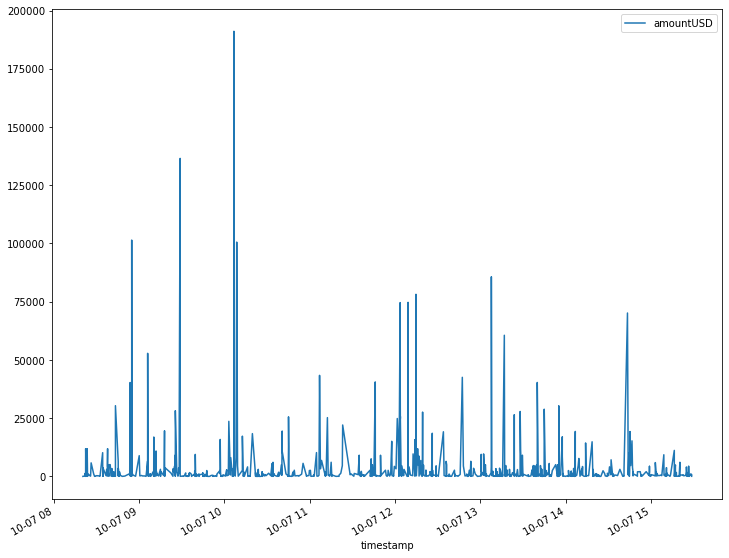

In [23]:
df.plot(x='timestamp',y='amountUSD', kind='line', subplots=True, figsize=(12,10))
plt.savefig("amountUSD.png")